In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split # Import the train_test_split function from scikit-learn for data splitting.
from sklearn.linear_model import LinearRegression  # Import the LinearRegression model from scikit-learn.
from sklearn import metrics

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [193]:
y_monthly = pd.read_csv("CSUSHPISA.csv").rename(columns={'DATE':'PERIOD','CSUSHPISA':'HOUSE_PRICE_INDEX'})
y_monthly['HOUSE_PRICE_INDEX'] = y_monthly["HOUSE_PRICE_INDEX"].round(2)
y_monthly.head()

,PERIOD,HOUSE_PRICE_INDEX
0,2004-01-01,141.65
1,2004-02-01,143.19
2,2004-03-01,145.06
3,2004-04-01,146.59
4,2004-05-01,148.18


In [194]:
y_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PERIOD             241 non-null    object 
 1   HOUSE_PRICE_INDEX  241 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [195]:
y_monthly['PERIOD'] = pd.to_datetime(y_monthly['PERIOD'])
y_monthly = y_monthly.set_index('PERIOD')
y_monthly.head()

,HOUSE_PRICE_INDEX
PERIOD,
2004-01-01,141.65
2004-02-01,143.19
2004-03-01,145.06
2004-04-01,146.59
2004-05-01,148.18


AFTER DOING SOME RESEARCH I FOUND OUT THAT THESE ARE SOME CRUCIAL SUPPLY AND DEMANDS FACTORS ON WHICH USA HOME PRICES TYPICALLY AFFECT :
1. Homes for Sale
2. Homes Sold
3. Federal Funds Rate
4. Disposable Personal Income
5. Mortgage Rates
6. Unemployment
7. USA GDP
8. Housing Starts
9. Months of Supply
10. Building Permits (Number)

**"House for Sale"**

In [173]:
house_sale_df = pd.read_excel("sale_cust.xls")[50:70].rename(
            columns = {"Houses For Sale by Region": "PERIOD" , "Unnamed: 1": "HOUSES_FOR_SALE"}).reset_index(drop=True).drop(
            columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'])
house_sale_df.tail()

,PERIOD,HOUSES_FOR_SALE
15,2019,327
16,2020,302
17,2021,391
18,2022,455
19,2023,453


In [174]:
house_sale_df["PERIOD"] = pd.to_datetime(house_sale_df['PERIOD'], format='%Y')
house_sale_df["HOUSES_FOR_SALE"] = house_sale_df["HOUSES_FOR_SALE"].astype(int)

house_sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PERIOD           20 non-null     datetime64[ns]
 1   HOUSES_FOR_SALE  20 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 372.0 bytes


In [133]:
# Set 'Period' as the index

house_sale_df.set_index('PERIOD', inplace=True)

# Up-sampling the annual data to Monthly

house_sale_df = house_sale_df.resample('MS').mean().round()

In [175]:
house_sale_df.head()

,PERIOD,HOUSES_FOR_SALE
0,2004-01-01,431
1,2005-01-01,515
2,2006-01-01,537
3,2007-01-01,496
4,2008-01-01,352


In [135]:
# fill nan values using a technique called Interpolation. Using 'linear' method to upsample the values of months linearly.

house_sale_df["HOUSES_FOR_SALE"].interpolate(method='linear', inplace=True)
#house_sale_df.reset_index(inplace=True)
house_sale_df["HOUSES_FOR_SALE"] = house_sale_df["HOUSES_FOR_SALE"].astype(int)
#house_sale_df.drop(house_sale_df.tail(3).index,inplace = True)

In [176]:
house_sale_df.head(20)

,PERIOD,HOUSES_FOR_SALE
0,2004-01-01,431
1,2005-01-01,515
2,2006-01-01,537
3,2007-01-01,496
4,2008-01-01,352
5,2009-01-01,232
6,2010-01-01,188
7,2011-01-01,150
8,2012-01-01,148
9,2013-01-01,186


**"House Sold"**

In [177]:
houses_sold_df = pd.read_excel("sold_cust.xls")[49:69].rename(columns = 
                                                         {"Houses Sold by Region": "PERIOD" , "Unnamed: 1": "HOUSES_SOLD"}
                                                        ).reset_index(drop=True).drop(columns=[
                                                                    'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'])
houses_sold_df.head()

,PERIOD,HOUSES_SOLD
0,2004,1203
1,2005,1283
2,2006,1051
3,2007,776
4,2008,485


In [178]:
houses_sold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PERIOD       20 non-null     object
 1   HOUSES_SOLD  20 non-null     object
dtypes: object(2)
memory usage: 452.0+ bytes


In [179]:
# Converting Period column to Python datetime form

houses_sold_df["PERIOD"] = pd.to_datetime(houses_sold_df['PERIOD'], format='%Y')

# Converting "Homes Sold" column to int 

houses_sold_df["HOUSES_SOLD"] = houses_sold_df['HOUSES_SOLD'].astype(int)

# Set 'Period' as the index

houses_sold_df.set_index('PERIOD', inplace=True)

In [180]:
# Up-sampling the annual data to Monthly

houses_sold_df = houses_sold_df.resample('MS').mean().round()

# fill nan values using a technique called Interpolation. Using 'linear' method to upsample the values of months linearly.

houses_sold_df["HOUSES_SOLD"].interpolate(method='linear', inplace=True)
houses_sold_df.reset_index(inplace=True)
houses_sold_df["HOUSES_SOLD"] = houses_sold_df["HOUSES_SOLD"].astype(int)
houses_sold_df.drop(houses_sold_df.tail(3).index,inplace = True)
houses_sold_df.head(10)

,PERIOD,HOUSES_SOLD
0,2004-01-01,1203
1,2004-02-01,1209
2,2004-03-01,1216
3,2004-04-01,1223
4,2004-05-01,1229
5,2004-06-01,1236
6,2004-07-01,1243
7,2004-08-01,1249
8,2004-09-01,1256
9,2004-10-01,1263


**"Federal Funds Rate"**

In [68]:
feds_df = pd.read_csv("Federal_Funds_Rate.csv").rename(columns = {"DATE": "PERIOD", "DFF": "FED_FUNDS_RATE"})
feds_df.head(3)

,PERIOD,FED_FUNDS_RATE
0,2004-01-01,0.94
1,2004-01-02,1.01
2,2004-01-03,1.01


In [70]:
## Converting Period column to Python datetime form

feds_df["PERIOD"] = pd.to_datetime(feds_df["PERIOD"])

# Set 'Period' as the index

feds_df.set_index('PERIOD', inplace=True)

# Upsampling 

feds_df = feds_df.resample('MS').mean()
# Interpolation 

feds_df["FED_FUNDS_RATE"].interpolate(method='linear', inplace=True)
feds_df.reset_index(inplace=True)
feds_df["FED_FUNDS_RATE"] = feds_df["FED_FUNDS_RATE"].round(2)
feds_df.head(10)

,PERIOD,FED_FUNDS_RATE
0,2004-01-01,1.00
1,2004-02-01,1.01
2,2004-03-01,1.00
3,2004-04-01,1.00
4,2004-05-01,1.00
5,2004-06-01,1.03
6,2004-07-01,1.26
7,2004-08-01,1.43
8,2004-09-01,1.60
9,2004-10-01,1.76


**"Disposable Personal Income"**

In [104]:
income_df = pd.read_csv("DSPI.csv")[540:].rename(columns = {"DATE": "PERIOD", "DSPI": "PERSONAL_INCOME"})
income_df['PERIOD'] = pd.to_datetime(income_df['PERIOD'])
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 540 to 780
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PERIOD           241 non-null    datetime64[ns]
 1   PERSONAL_INCOME  241 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [105]:
income_df.head()

,PERIOD,PERSONAL_INCOME
540,2004-01-01,8719.7
541,2004-02-01,8753.9
542,2004-03-01,8802.8
543,2004-04-01,8849.0
544,2004-05-01,8922.0


**"Unemployement"**

In [86]:
unemp_df = pd.read_csv('UNRATE.csv').rename(columns={'DATE':'PERIOD', 'UNRATE':'UNEMPLOYEMENT'})
unemp_df["PERIOD"] = pd.to_datetime(unemp_df["PERIOD"])
unemp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PERIOD         241 non-null    datetime64[ns]
 1   UNEMPLOYEMENT  241 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [87]:
unemp_df.head()

,PERIOD,UNEMPLOYEMENT
0,2004-01-01,5.7
1,2004-02-01,5.6
2,2004-03-01,5.8
3,2004-04-01,5.6
4,2004-05-01,5.6


**"GDP"**

In [88]:
gdp_df = pd.read_csv("USALORSGPNOSTSAM.csv").rename(columns={'DATE': 'PERIOD', 'USALORSGPNOSTSAM':'USA_GDP'})
gdp_df["PERIOD"] = pd.to_datetime(gdp_df["PERIOD"])
gdp_df["USA_GDP"] = round(gdp_df["USA_GDP"], 2)
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   PERIOD   239 non-null    datetime64[ns]
 1   USA_GDP  239 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [89]:
gdp_df.head()

,PERIOD,USA_GDP
0,2004-01-01,99.59
1,2004-02-01,99.60
2,2004-03-01,99.61
3,2004-04-01,99.63
4,2004-05-01,99.67


**"Building Permits"**

In [137]:
permits_df = pd.read_csv('PERMIT.csv').rename(
            columns = {"DATE": "PERIOD" , 
                       "PERMIT": "PERMIT_NUMBER"})
permits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PERIOD         239 non-null    object 
 1   PERMIT_NUMBER  239 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [138]:
# Converting Period column to Python datetime form

permits_df["PERIOD"] = pd.to_datetime(permits_df['PERIOD'], format='mixed')

# Converting "Permits_Number" column to int 

permits_df["PERMIT_NUMBER"] = permits_df['PERMIT_NUMBER'].astype(int)
permits_df.head(10)

,PERIOD,PERMIT_NUMBER
0,2004-01-01,1952
1,2004-02-01,1966
2,2004-03-01,2066
3,2004-04-01,2070
4,2004-05-01,2150
5,2004-06-01,2020
6,2004-07-01,2112
7,2004-08-01,2056
8,2004-09-01,2041
9,2004-10-01,2097


**"Months of supply"**

In [101]:
mos_df = pd.read_csv('MSACSR.csv')[492:].rename(columns={'DATE':'PERIOD', 'MSACSR':'MONTHS_OF_SUPPLY'})
mos_df["PERIOD"] = pd.to_datetime(mos_df["PERIOD"])
mos_df.head(10)

,PERIOD,MONTHS_OF_SUPPLY
492,2004-01-01,3.8
493,2004-02-01,3.7
494,2004-03-01,3.6
495,2004-04-01,4.0
496,2004-05-01,3.8
497,2004-06-01,3.9
498,2004-07-01,4.5
499,2004-08-01,4.3
500,2004-09-01,4.1
501,2004-10-01,3.9


**"Housing Start"**

In [149]:
hs_df = pd.read_csv("HOUST.csv").rename(columns = {"DATE": "PERIOD"})
hs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PERIOD  241 non-null    object 
 1   HOUST   241 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [150]:
hs_df["PERIOD"] = pd.to_datetime(hs_df["PERIOD"])
hs_df.head()

,PERIOD,HOUST
0,2004-01-01,1911.0
1,2004-02-01,1846.0
2,2004-03-01,1998.0
3,2004-04-01,2003.0
4,2004-05-01,1981.0


**"Mortgage"**

In [112]:
mrtg_df = pd.read_csv('MORTGAGE30US.csv').rename(columns={'DATE':'PERIOD', 'MORTGAGE30US':'MORTGAGE'})
mrtg_df["PERIOD"] = pd.to_datetime(mrtg_df["PERIOD"])
mrtg_df["MORTGAGE"] = mrtg_df["MORTGAGE"].round(2)
mrtg_df.head(10)

,PERIOD,MORTGAGE
0,2004-01-08,5.87
1,2004-01-15,5.66
2,2004-01-22,5.64
3,2004-01-29,5.68
4,2004-02-05,5.72
5,2004-02-12,5.66
6,2004-02-19,5.58
7,2004-02-26,5.58
8,2004-03-04,5.59
9,2004-03-11,5.41


In [113]:
# Set 'Period' as the index

mrtg_df.set_index('PERIOD', inplace=True)

# Upsampling 

mrtg_df = mrtg_df.resample('MS').mean()

# Interpolation 

mrtg_df["MORTGAGE"].interpolate(method='linear', inplace=True)
mrtg_df.reset_index(inplace=True)

In [114]:
mrtg_df.head(10)

,PERIOD,MORTGAGE
0,2004-01-01,5.7125
1,2004-02-01,5.6350
2,2004-03-01,5.4450
3,2004-04-01,5.8300
4,2004-05-01,6.2700
5,2004-06-01,6.2875
6,2004-07-01,6.0560
7,2004-08-01,5.8675
8,2004-09-01,5.7540
9,2004-10-01,5.7225


In [181]:
dfs = [gdp_df, unemp_df, mos_df, permits_df, mrtg_df, hs_df, income_df, feds_df, houses_sold_df, house_sale_df]

In [196]:
x_monthly = pd.merge(dfs[0], dfs[1], how='outer', on='PERIOD')
for df in dfs[2:]:
    x_monthly = pd.merge(x_monthly, df, how='outer', on='PERIOD')
x_monthly.set_index('PERIOD', inplace=True)
x_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2004-01-01 to 2024-01-01
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   USA_GDP           239 non-null    float64
 1   UNEMPLOYEMENT     241 non-null    float64
 2   MONTHS_OF_SUPPLY  241 non-null    float64
 3   PERMIT_NUMBER     239 non-null    float64
 4   MORTGAGE          240 non-null    float64
 5   HOUST             241 non-null    float64
 6   PERSONAL_INCOME   241 non-null    float64
 7   FED_FUNDS_RATE    241 non-null    float64
 8   HOUSES_SOLD       226 non-null    float64
 9   HOUSES_FOR_SALE   20 non-null     float64
dtypes: float64(10)
memory usage: 20.7 KB


In [197]:
x_monthly.head()

,USA_GDP,UNEMPLOYEMENT,MONTHS_OF_SUPPLY,PERMIT_NUMBER,MORTGAGE,HOUST,PERSONAL_INCOME,FED_FUNDS_RATE,HOUSES_SOLD,HOUSES_FOR_SALE
PERIOD,,,,,,,,,,
2004-01-01,99.59,5.7,3.8,1952.0,5.7125,1911.0,8719.7,1.00,1203.0,431.0
2004-02-01,99.60,5.6,3.7,1966.0,5.6350,1846.0,8753.9,1.01,1209.0,NaN
2004-03-01,99.61,5.8,3.6,2066.0,5.4450,1998.0,8802.8,1.00,1216.0,NaN
2004-04-01,99.63,5.6,4.0,2070.0,5.8300,2003.0,8849.0,1.00,1223.0,NaN
2004-05-01,99.67,5.6,3.8,2150.0,6.2700,1981.0,8922.0,1.00,1229.0,NaN


In [198]:
x_monthly.isnull().sum()

USA_GDP               2
UNEMPLOYEMENT         0
MONTHS_OF_SUPPLY      0
PERMIT_NUMBER         2
MORTGAGE              1
HOUST                 0
PERSONAL_INCOME       0
FED_FUNDS_RATE        0
HOUSES_SOLD          15
HOUSES_FOR_SALE     221
dtype: int64

In [199]:
x_monthly.tail()

,USA_GDP,UNEMPLOYEMENT,MONTHS_OF_SUPPLY,PERMIT_NUMBER,MORTGAGE,HOUST,PERSONAL_INCOME,FED_FUNDS_RATE,HOUSES_SOLD,HOUSES_FOR_SALE
PERIOD,,,,,,,,,,
2023-09-01,100.30,3.8,7.5,1515.0,7.200,1363.0,20392.5,5.33,NaN,NaN
2023-10-01,100.40,3.8,7.9,1534.0,7.620,1365.0,20403.8,5.33,NaN,NaN
2023-11-01,100.49,3.7,8.8,1508.0,7.442,1510.0,20449.8,5.33,NaN,NaN
2023-12-01,NaN,3.7,8.2,NaN,6.815,1568.0,20511.5,5.33,NaN,NaN
2024-01-01,NaN,3.7,8.3,NaN,NaN,1376.0,20652.8,5.33,NaN,NaN


In [200]:
x_monthly.loc[(x_monthly['USA_GDP'].isnull() == True), 'USA_GDP'] = x_monthly['USA_GDP'].mean()
x_monthly.loc[(x_monthly['PERMIT_NUMBER'].isnull() == True), 'PERMIT_NUMBER'] = x_monthly['PERMIT_NUMBER'].mean()
x_monthly.loc[(x_monthly['MORTGAGE'].isnull() == True), 'MORTGAGE'] = x_monthly['MORTGAGE'].mean()
x_monthly.loc[(x_monthly['HOUSES_SOLD'].isnull() == True), 'HOUSES_SOLD'] = x_monthly['HOUSES_SOLD'].mean()
x_monthly.loc[(x_monthly['HOUSES_FOR_SALE'].isnull() == True), 'HOUSES_FOR_SALE'] = x_monthly['HOUSES_FOR_SALE'].mean()

x_monthly.isnull().sum()

USA_GDP             0
UNEMPLOYEMENT       0
MONTHS_OF_SUPPLY    0
PERMIT_NUMBER       0
MORTGAGE            0
HOUST               0
PERSONAL_INCOME     0
FED_FUNDS_RATE      0
HOUSES_SOLD         0
HOUSES_FOR_SALE     0
dtype: int64

In [201]:
x_monthly.tail()

,USA_GDP,UNEMPLOYEMENT,MONTHS_OF_SUPPLY,PERMIT_NUMBER,MORTGAGE,HOUST,PERSONAL_INCOME,FED_FUNDS_RATE,HOUSES_SOLD,HOUSES_FOR_SALE
PERIOD,,,,,,,,,,
2023-09-01,100.300000,3.8,7.5,1515.000000,7.2000,1363.0,20392.5,5.33,630.920354,325.45
2023-10-01,100.400000,3.8,7.9,1534.000000,7.6200,1365.0,20403.8,5.33,630.920354,325.45
2023-11-01,100.490000,3.7,8.8,1508.000000,7.4420,1510.0,20449.8,5.33,630.920354,325.45
2023-12-01,99.918033,3.7,8.2,1290.351464,6.8150,1568.0,20511.5,5.33,630.920354,325.45
2024-01-01,99.918033,3.7,8.3,1290.351464,4.7321,1376.0,20652.8,5.33,630.920354,325.45


In [202]:
print(x_monthly.dtypes)
print('\n')
print(y_monthly.dtypes)

USA_GDP             float64
UNEMPLOYEMENT       float64
MONTHS_OF_SUPPLY    float64
PERMIT_NUMBER       float64
MORTGAGE            float64
HOUST               float64
PERSONAL_INCOME     float64
FED_FUNDS_RATE      float64
HOUSES_SOLD         float64
HOUSES_FOR_SALE     float64
dtype: object


HOUSE_PRICE_INDEX    float64
dtype: object


In [204]:
# Creating x feature variable containing specific columns from the 'x_monthly'.

x = x_monthly[['USA_GDP', 'UNEMPLOYEMENT', 'MONTHS_OF_SUPPLY', 'PERMIT_NUMBER', 
               'MORTGAGE', 'HOUST', 'PERSONAL_INCOME', 'FED_FUNDS_RATE', 
               'HOUSES_SOLD', 'HOUSES_FOR_SALE', 'HOUSES_SOLD']]
x.head(10)

,USA_GDP,UNEMPLOYEMENT,MONTHS_OF_SUPPLY,PERMIT_NUMBER,MORTGAGE,HOUST,PERSONAL_INCOME,FED_FUNDS_RATE,HOUSES_SOLD,HOUSES_FOR_SALE,HOUSES_SOLD
PERIOD,,,,,,,,,,,
2004-01-01,99.59,5.7,3.8,1952.0,5.7125,1911.0,8719.7,1.00,1203.0,431.00,1203.0
2004-02-01,99.60,5.6,3.7,1966.0,5.6350,1846.0,8753.9,1.01,1209.0,325.45,1209.0
2004-03-01,99.61,5.8,3.6,2066.0,5.4450,1998.0,8802.8,1.00,1216.0,325.45,1216.0
2004-04-01,99.63,5.6,4.0,2070.0,5.8300,2003.0,8849.0,1.00,1223.0,325.45,1223.0
2004-05-01,99.67,5.6,3.8,2150.0,6.2700,1981.0,8922.0,1.00,1229.0,325.45,1229.0
2004-06-01,99.72,5.6,3.9,2020.0,6.2875,1828.0,8952.9,1.03,1236.0,325.45,1236.0
2004-07-01,99.79,5.5,4.5,2112.0,6.0560,2002.0,8981.0,1.26,1243.0,325.45,1243.0
2004-08-01,99.88,5.4,4.3,2056.0,5.8675,2024.0,9012.9,1.43,1249.0,325.45,1249.0
2004-09-01,99.98,5.4,4.1,2041.0,5.7540,1905.0,9034.6,1.60,1256.0,325.45,1256.0


<Axes: >

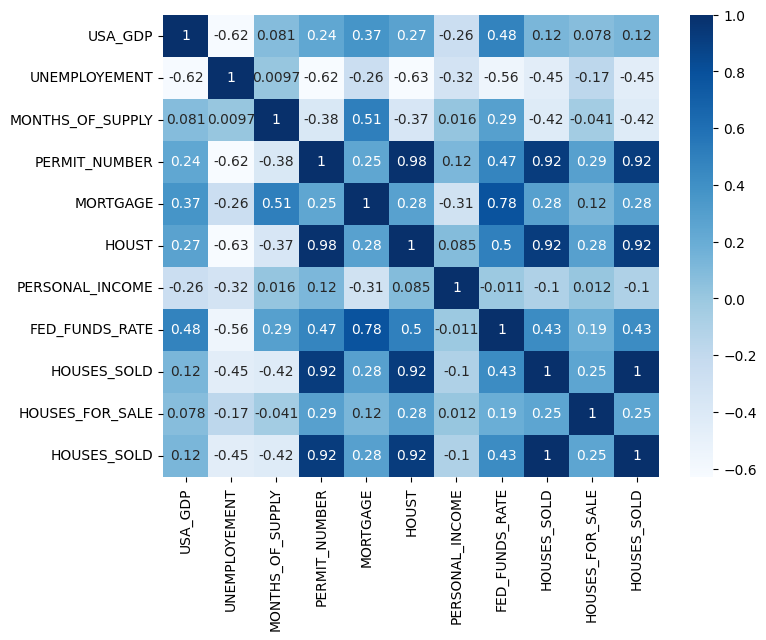

In [219]:
plt.figure(figsize=(8,6))
sns.heatmap(data=x.corr(),annot=True,cmap='Blues')

In [205]:
# 'y' Represents target variable for modeling

y = y_monthly[['HOUSE_PRICE_INDEX']]
y.head(3)

,HOUSE_PRICE_INDEX
PERIOD,
2004-01-01,141.65
2004-02-01,143.19
2004-03-01,145.06


In [218]:
# Split the feature data 'x' and target variable 'y' into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False, stratify=None)

# Creating Linear Regression model instance
model = LinearRegression()

# Train the model using corresponding feature and target values
model.fit(X_train, y_train)

LinearRegression()

In [220]:
# Make predictions on the test data 'X_test'

y_pred = model.predict(X_test)
y_pred[0:3]

array([[200.30899236],
       [200.17785334],
       [202.08008513]])

In [208]:
#  Finding out the relationship between each feature and the target variable.

print(model.coef_)

[[-5.66086472e+00 -2.59273528e+00  2.43961041e+00  2.40972567e-02
   1.92599520e+00  6.19200496e-03  9.00224240e-03  5.45769791e+00
  -9.15181707e-03 -1.77837834e-03 -9.15181706e-03]]


In [209]:
# Printing estimated values(intercepts) when all features are zero

print(model.intercept_)

[585.10904351]


In [210]:
print(model.score(X_train, y_train))

0.9611786593903371


In [211]:
print(model.score(X_test, y_test))

0.6686500937187729


In [212]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))

Mean Absolute Error: 18.864214208466503


In [213]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))

Mean Squared Error: 593.173734159561


In [214]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Root Mean Squared Error: 24.355158265951815


In [215]:
print(y_test.describe())

       HOUSE_PRICE_INDEX
count          73.000000
mean          250.598219
std            42.603248
min           198.300000
25%           209.250000
50%           239.680000
75%           298.400000
max           315.550000


In [222]:
# Actual target values from y_test vs predicted values by the model

result = pd.DataFrame({'ACTUAL': y_test.squeeze(), 'PREDICTED': y_pred.squeeze()})
result.head(10)

,ACTUAL,PREDICTED
PERIOD,,
2018-01-01,198.30,200.308992
2018-02-01,199.23,200.177853
2018-03-01,199.97,202.080085
2018-04-01,200.66,204.185368
2018-05-01,201.43,204.929385
2018-06-01,202.24,205.619698
2018-07-01,202.91,207.734207
2018-08-01,203.66,208.808448
2018-09-01,204.32,210.995654


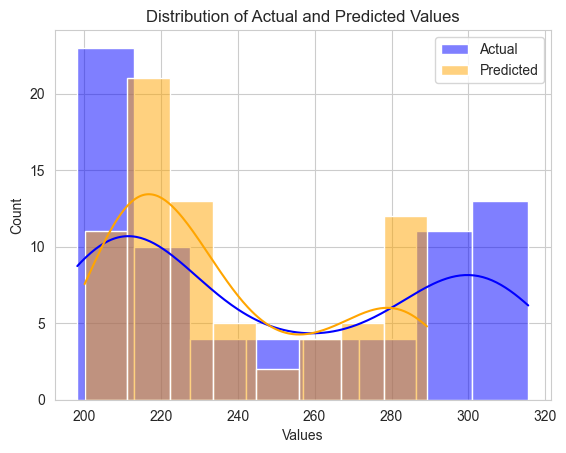

In [226]:
sns.histplot(result['ACTUAL'], color='blue', label='Actual', kde=True)
sns.histplot(result['PREDICTED'], color='orange', label='Predicted', kde=True)
plt.xlabel('Values')
plt.title('Distribution of Actual and Predicted Values')
plt.legend()
plt.show()

In [238]:
residuals = y_test-y_predict

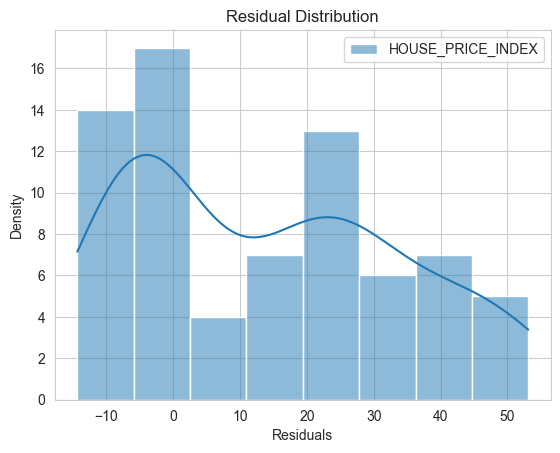

In [243]:
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Residual Distribution")
plt.show()